# **House Price Prediction**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 14)

Data Info and description

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Handling null / missing values

In [6]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,5
age,0
dis,0
rad,0
tax,0


In [7]:
df['rm'] = df['rm'].fillna(df['rm'].mean())

In [8]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


Understanding correlation between features

In [9]:
corr = df.corr()

<Axes: >

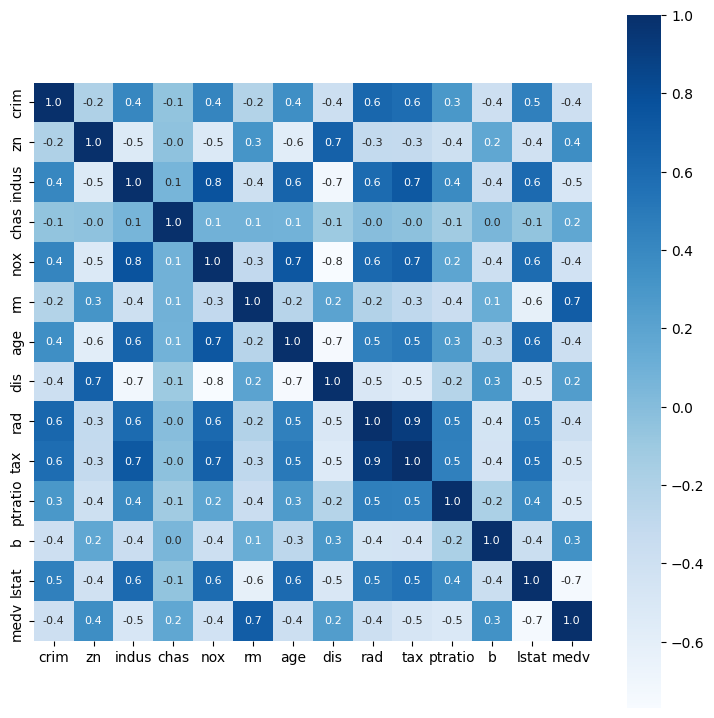

In [10]:
plt.figure(figsize=(9,9))
sns.heatmap(corr, cbar=True, square=True, annot=True, fmt='.1f', annot_kws={'size':8}, cmap='Blues')

Separating data features and output variable

In [11]:
X = df.drop(['medv'], axis=1)
Y = df['medv']

Training Testing Data splitting

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [13]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


Model Training

In [14]:
model = XGBRegressor()

In [15]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Model Accuracy Evaluation

In [22]:
# Model accuracy evaluation on training dataset
Y_train_pred = model.predict(X_train)
score_1 = r2_score(Y_train, Y_train_pred)
score_2 = mean_absolute_error(Y_train, Y_train_pred)
print("R2 Score: ", score_1)
print("Mean Absolute Error: ", score_2)

R2 Score:  0.9999980063301562
Mean Absolute Error:  0.009234079275981062


Text(0.5, 1.0, 'Actual Prices v/s Predicted Prices')

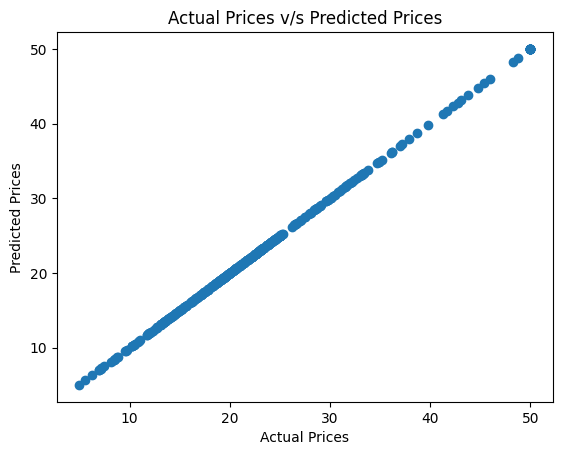

In [23]:
plt.scatter(Y_train, Y_train_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices v/s Predicted Prices")

In [24]:
# Model accuracy evaluation on testing dataset
Y_test_pred = model.predict(X_test)
score_1 = r2_score(Y_test, Y_test_pred)
score_2 = mean_absolute_error(Y_test, Y_test_pred)
print("R2 Score: ", score_1)
print("Mean Absolute Error: ", score_2)

R2 Score:  0.9086914968243068
Mean Absolute Error:  2.058270358104332


Text(0.5, 1.0, 'Actual Prices v/s Predicted Prices')

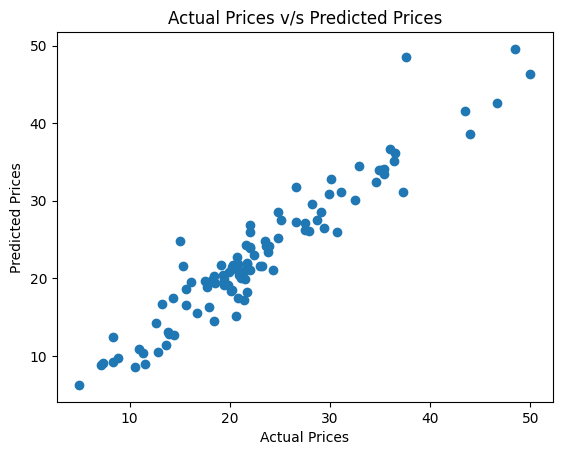

In [25]:
plt.scatter(Y_test, Y_test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices v/s Predicted Prices")